In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# introduction to Image Data w/ python

In [40]:
import pandas as pd
import numpy as np

from glob import glob

import cv2 
import matplotlib.pylab as plt

## Reading in Images

In [9]:
dog_files = glob('../input/test-set/test_set/dogs/*.jpg')
cat_files = glob('../input/test-set/test_set/cats/*.jpg')

In [14]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((394, 499, 3), (394, 499, 3))

## Image Array
(Height, Width, Channels)

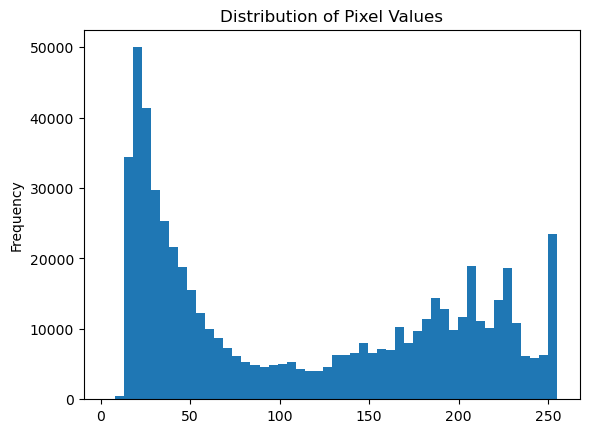

In [16]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

## Display Images

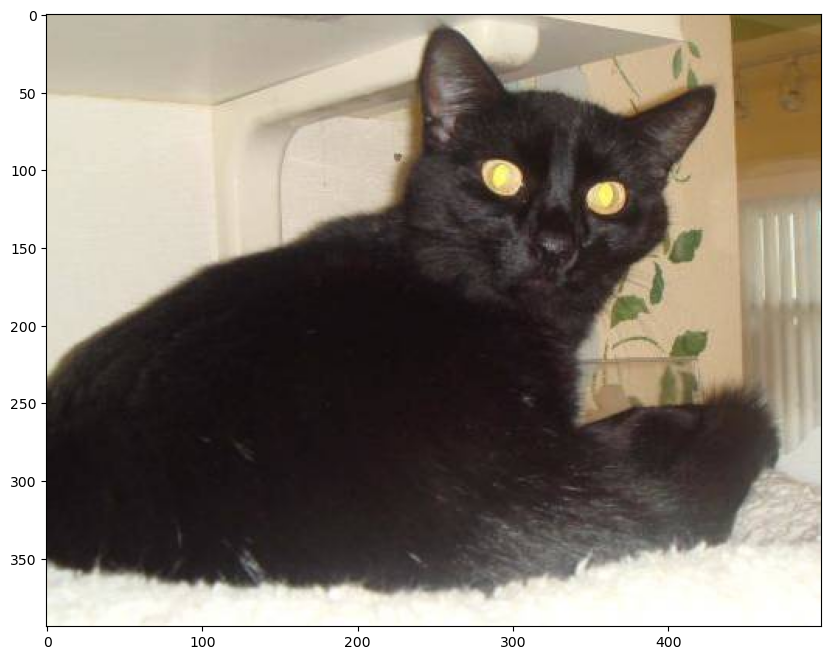

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('on')
plt.show()

## Image Channels

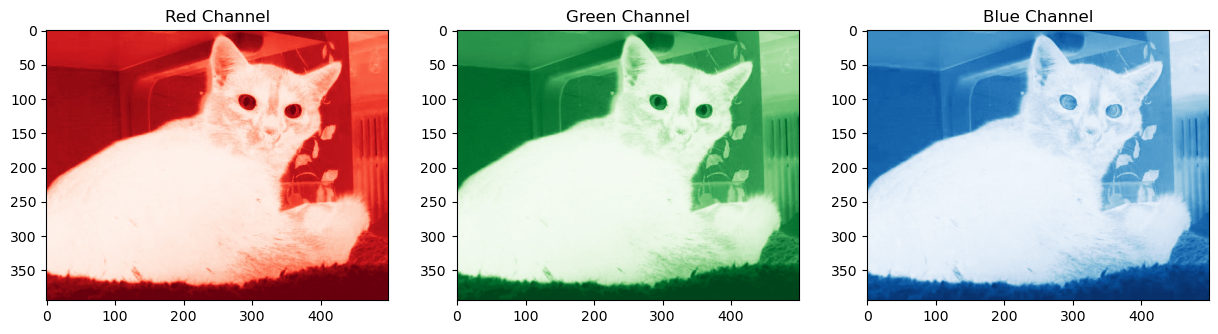

In [21]:
# Display RGB Channels of our Image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')
plt.show()

## Matplotlib vs cv2 Numpy Arrays
- cv2 reads in chnannels as BGR
- matplotlib reads in channels as RGB

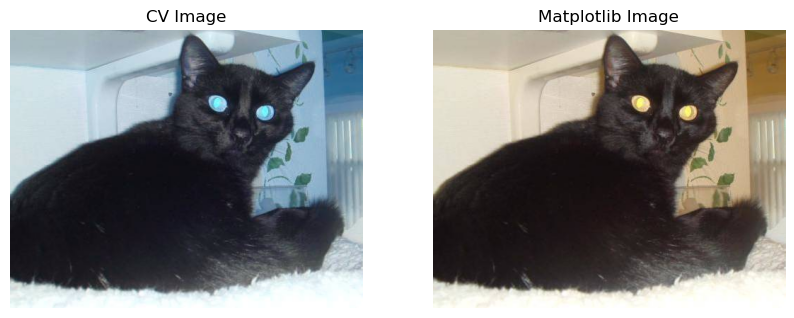

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV Image')
axs[1].set_title('Matplotlib Image')
plt.show()

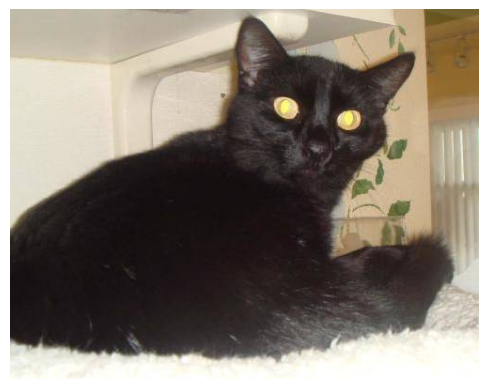

In [26]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

## Image Manipulation

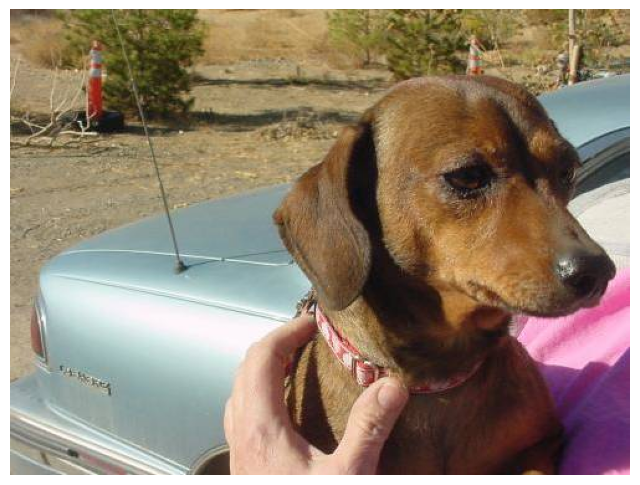

In [27]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

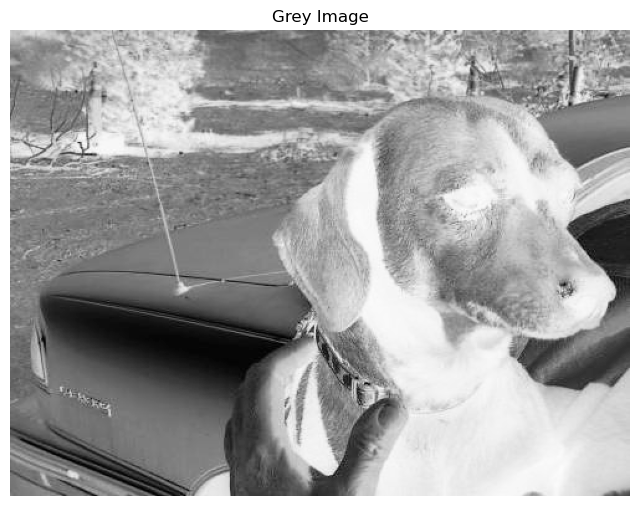

In [30]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

## Resizing and Scaling

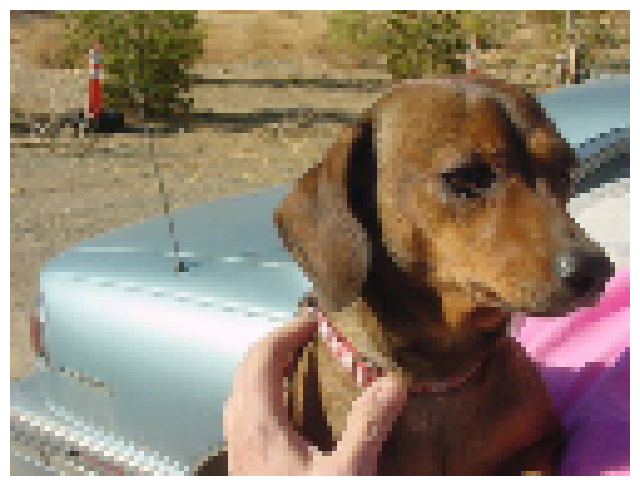

In [32]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

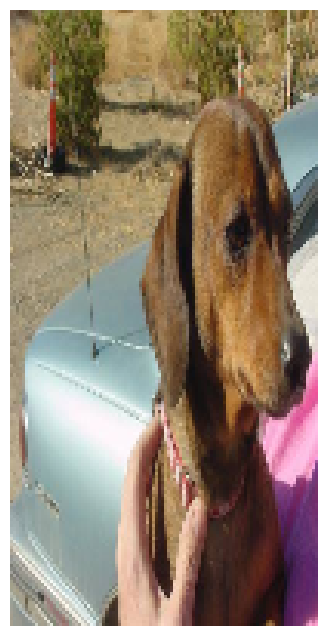

In [35]:
# Different size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

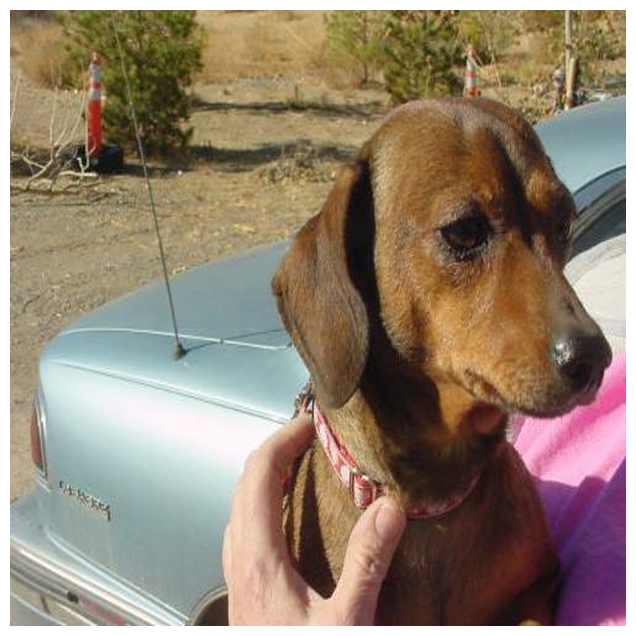

In [37]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

In [38]:
img_resize.shape, img.shape

((5000, 5000, 3), (375, 499, 3))

# Cv2 Kernels

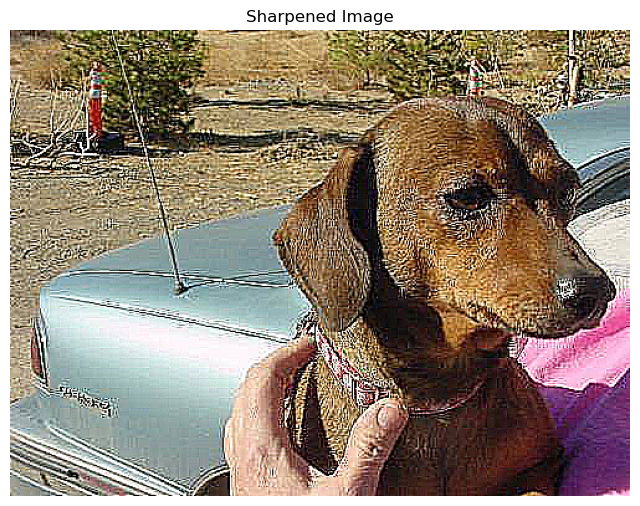

In [46]:
# Sharpen Image
kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

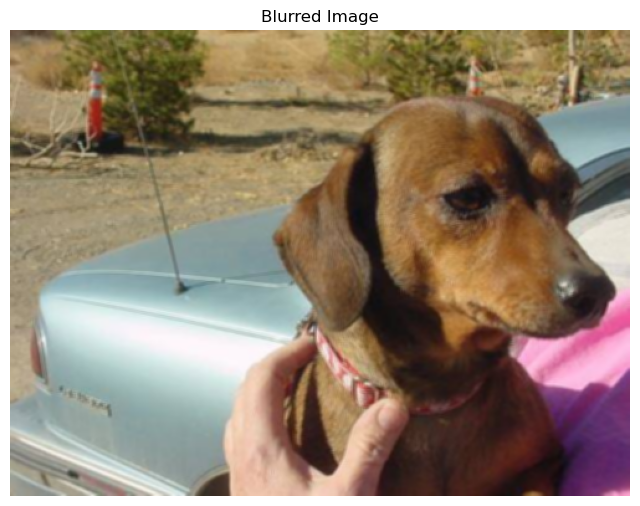

In [47]:
# Blurring the Image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

## Save Image

In [48]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True

## The End